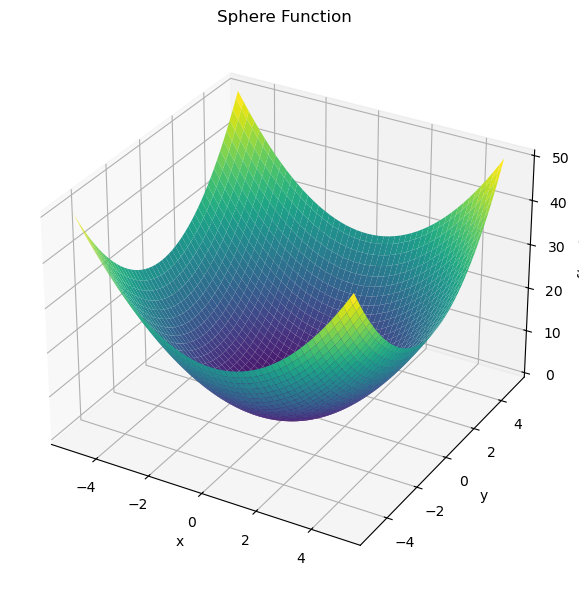

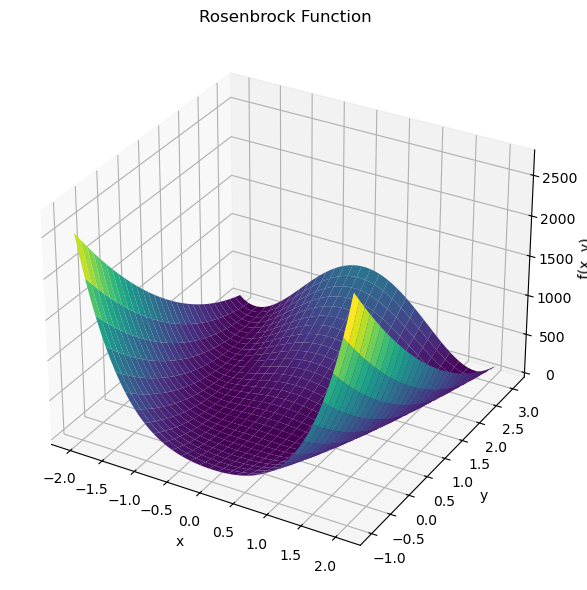

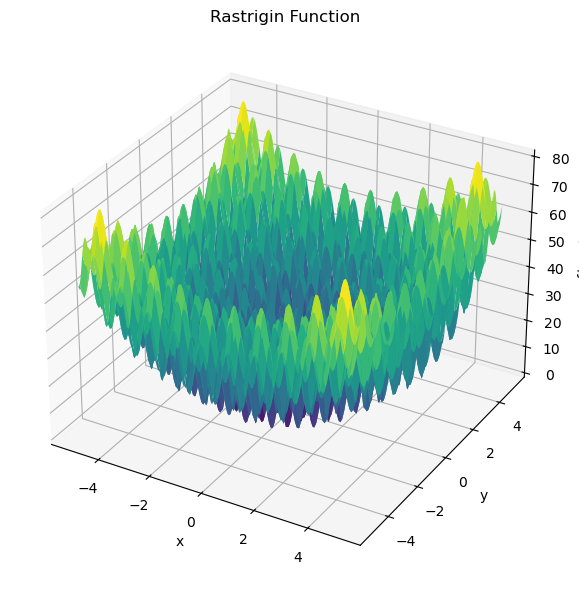

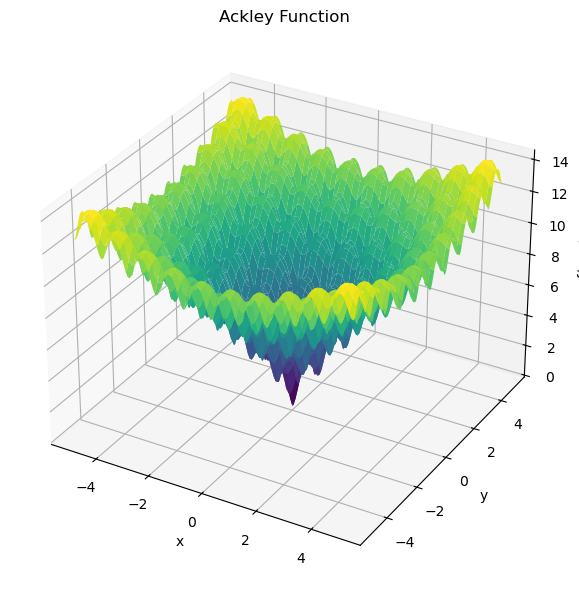

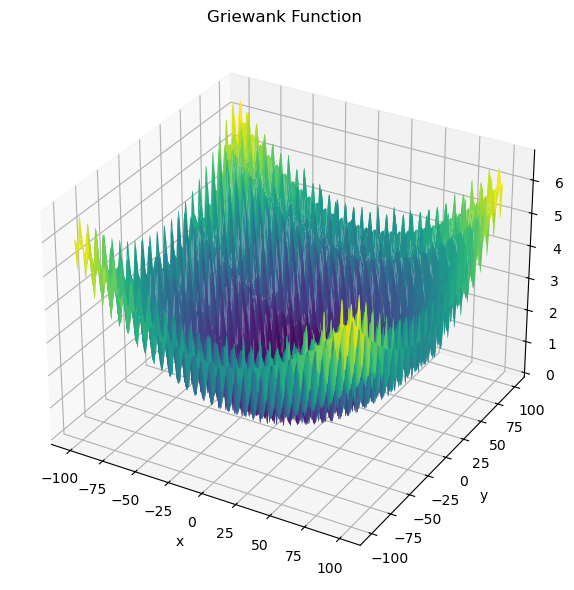

In [1]:
from obj_funcs_lib import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# For each objective function in the dictionary
for name, func in OBJ_FUNCS.items():
    # Determine plotting domain based on function name or docstring
    if name in ["beale"]:
        xlim, ylim = (-4.5, 4.5), (-4.5, 4.5)
    elif name in ["booth"]:
        xlim, ylim = (-10, 10), (-10, 10)
    elif name == "bukin6":
        xlim, ylim = (-15, -5), (-3, 3)
    elif name == "easom":
        xlim, ylim = (-10, 10), (-10, 10)
    elif name == "schwefel":
        xlim, ylim = (-100, 100), (-100, 100)
    elif name == "rastrigin":
        xlim, ylim = (-5.12, 5.12), (-5.12, 5.12)
    elif name == "griewank":
        xlim, ylim = (-100, 100), (-100, 100)
    elif name == "sphere":
        xlim, ylim = (-5, 5), (-5, 5)
    elif name == "rosenbrock":
        xlim, ylim = (-2, 2), (-1, 3)
    elif name == "ackley":
        xlim, ylim = (-5, 5), (-5, 5)
    else:
        xlim, ylim = (-5, 5), (-5, 5)
        
    # Make grid
    step = 0.07
    X = np.arange(xlim[0], xlim[1]+step, step)
    Y = np.arange(ylim[0], ylim[1]+step, step)
    X_grid, Y_grid = np.meshgrid(X, Y)
    XY = np.stack([X_grid, Y_grid], axis=-1)
    try:
        Z = func(XY)
    except Exception as e:
        # If function needs n-dimensional input, fix for two dims only
        Z = func(np.stack([X_grid, Y_grid], axis=-1))
    # Squeeze last axes in case
    Z = np.squeeze(Z)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X_grid, Y_grid, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f"{name.capitalize()} Function")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    plt.tight_layout()
    plt.show()
